In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn.ensemble as ske
import sklearn.tree as tree
import sklearn.linear_model as lin
import sklearn.neighbors as neighbors

from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
plt.style.use('seaborn')


import warnings
warnings.filterwarnings('ignore')

In [2]:
def data_for_grid(sample_size):
    
    
    train = pd.read_csv('../../trainingandtestdata/clean_train.csv').sample(n = sample_size) 
    test = pd.read_csv('../../trainingandtestdata/clean_test.csv')
    tfidf = TfidfVectorizer(strip_accents='unicode', lowercase=True, tokenizer=None, ngram_range=(1, 2), analyzer='word', stop_words='english', max_features=5000)

    train_mat = tfidf.fit_transform(train['text'])

    X_train = train_mat
    y_train = train['polarity']
    
    test_mat = tfidf.transform(test['text'])

    X_test = test_mat
    y_test = test['polarity']
    
    return X_train, y_train, X_test

In [3]:
def run_models():

    
    train = pd.read_csv('../../trainingandtestdata/clean_train.csv')
    test = pd.read_csv('../../trainingandtestdata/clean_test.csv')
    tfidf = TfidfVectorizer(strip_accents='unicode', lowercase=True, tokenizer=None, ngram_range=(1, 2), analyzer='word', stop_words='english', max_features=5000)

    train_mat = tfidf.fit_transform(train['text'])

    X_train = train_mat
    y_train = train['polarity']


    test_mat = tfidf.transform(test['text'])

    X_test = test_mat
    y_test = test['polarity']

    #for all of these: n_jobs=-1
    model_list = [ske.RandomForestClassifier(max_depth= 4, min_samples_split = 2, n_estimators=150, n_jobs =-1, verbose=10), 
                 ske.GradientBoostingClassifier(learning_rate = 0.1, max_depth=4, min_samples_leaf=1, n_estimators= 2), 
                  tree.DecisionTreeClassifier(max_depth = 4, max_features = None, min_samples_split= 2), 
                 lin.LogisticRegression(dual = False, penalty = 'l2'),
                neighbors.KNeighborsClassifier(n_jobs=-1)
                 ]
    
    for model in model_list:
        current_model = model
        current_model.fit(X_train, y_train)
        pred = current_model.predict(X_test)
        score = current_model.score(X_test, y_test)
        print("model: {} → score: {}".format(current_model, score))
        print()
    
    

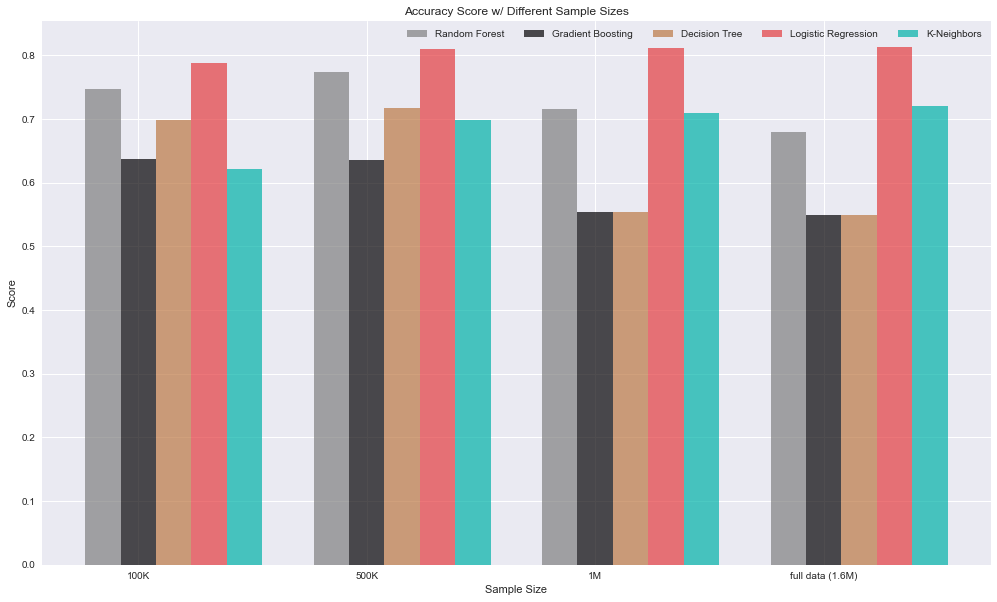

In [5]:
n = 4

rf= (0.747, 0.774, 0.715, 0.680)
gb = (0.637, 0.635, 0.554, 0.55)
dec = (0.699, 0.718, 0.554, 0.55)
log = (0.788, 0.810, 0.811, 0.813)
kn = (0.621, 0.699, 0.71, 0.72)




fig, ax = plt.subplots(figsize=(17, 10))
x = np.arange(n)
bar_width = 0.155
opacity = 0.7

ax.bar(x, rf, bar_width, alpha=opacity, color='gray',label='Random Forest')

ax.bar(x+bar_width, gb, bar_width, alpha=opacity, color='#040204',label='Gradient Boosting')

ax.bar(x+2*bar_width, dec, bar_width, alpha=opacity,color='#BC7844', label='Decision Tree')

ax.bar(x+3*bar_width, log, bar_width, alpha=opacity,color='#E43C40', label='Logistic Regression')

ax.bar(x+4*bar_width, kn, bar_width, alpha=opacity,color='#00B2A9', label='K-Neighbors')

ax.set_xlabel('Sample Size')
ax.set_ylabel('Score')
ax.set_title('Accuracy Score w/ Different Sample Sizes')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(['100K', '500K', '1M', 'full data (1.6M)'])
ax.legend(ncol=5)
plt.show()

Text(0.5, 1.0, 'Accuracy Score w/ Different Sample Sizes')

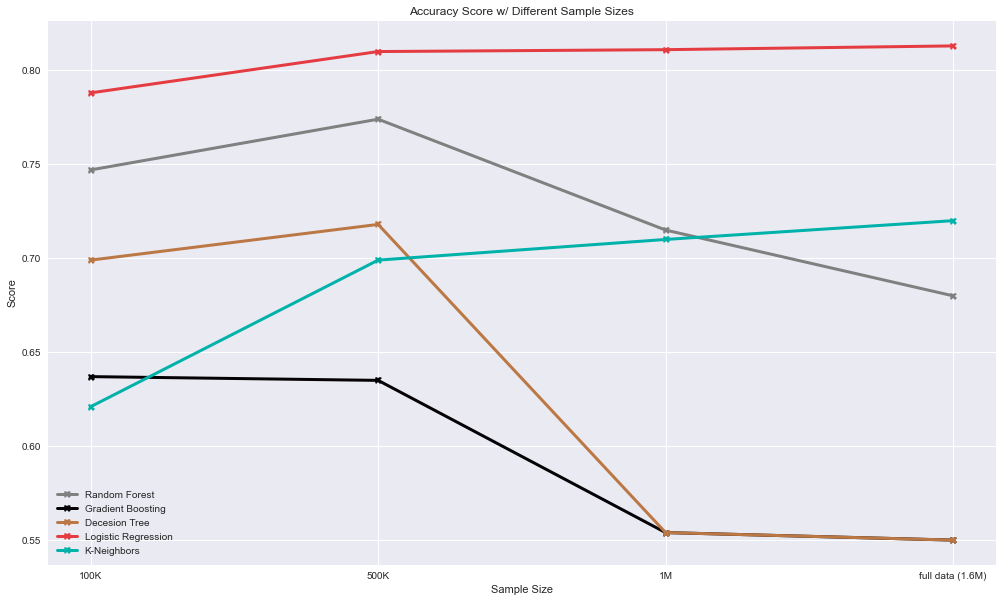

In [7]:
fig, ax = plt.subplots(figsize=(17, 10))

x = ['100K', '500K', '1M', 'full data (1.6M)']

rf= [0.747, 0.774, 0.715, 0.680]
gb = [0.637, 0.635, 0.554, 0.55]
dec = [0.699, 0.718, 0.554, 0.55]
log = [0.788, 0.810, 0.811, 0.813]
kn = [0.621, 0.699, 0.71, 0.72]

things_to_plot = [rf, gb, dec, log, kn]
labels = ['Random Forest', 'Gradient Boosting', 'Decesion Tree', 'Logistic Regression', 'K-Neighbors']
colors = ['gray', '#040204','#BC7844', '#E43C40', '#00B2A9']


for index in range(0, len(things_to_plot)):
    ax.plot(x, things_to_plot[index], label = labels[index], marker ='X', color = colors[index], linewidth=3)

ax.legend()
ax.set_xlabel("Sample Size")
ax.set_ylabel("Score")
ax.set_title('Accuracy Score w/ Different Sample Sizes')